## Francis Samuel

In [1]:
## Set up the environment for analysis

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
print("good to go")

good to go


In [2]:
# Import ur data
url = "../datasets/medical_examination.csv"
md = pd.read_csv(url)

In [3]:
md

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
# Create a Copy of the data for analysis
df = md.copy()

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
##  removing one "id" column from the dataframe
del df["id"]
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
# Correcting the age column to an actual age
# checking the columns also

df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
df["age"] = df["age"]//365
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
### Adding an overweight column and normalizing with zero for not overweight and 1 for overweight

df["overweight"] = np.where(df["weight"] / (df["height"] * df["height"]) * 10000 > 25,1,0,)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,1


In [10]:
## Normalizing the "cholestrol", "gluc" columns with the 0 and 1 conditions
## with ) been good and 1 not good

df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,50,2,168,62.0,110,80,0,0,0,0,1,0,0
1,55,1,156,85.0,140,90,1,0,0,0,1,1,1
2,51,1,165,64.0,130,70,1,0,0,0,0,1,0
3,48,2,169,82.0,150,100,0,0,0,0,1,1,1
4,47,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,61,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,52,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,61,1,163,72.0,135,80,0,1,0,0,0,1,1


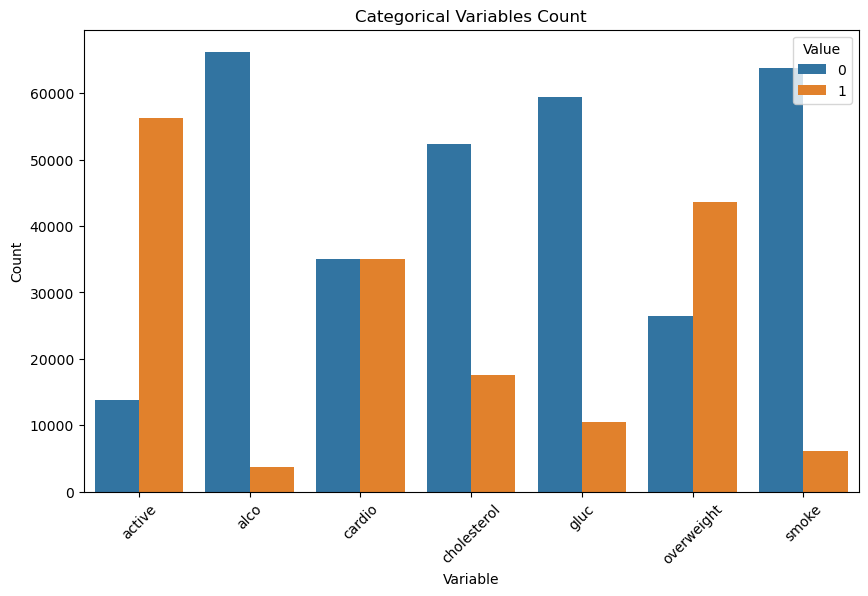

In [19]:
##
# Melting the DataFrame to convert categorical variables to a long format
df_cat = pd.melt(frame=df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'])

# Grouping by 'variable' and 'value', and then counting occurrences
df_cat = df_cat.groupby(['variable', 'value'])['value'].count().reset_index(name='count')

# Sorting the DataFrame by 'variable' and 'value'
df_cat = df_cat.sort_values(by=['variable', 'value'])

# Plotting the categorical data using a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
sb.barplot(x='variable', y='count', hue='value', data=df_cat)
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Categorical Variables Count')
plt.legend(title='Value', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [30]:
## cleaning the data, filtering out the condition
## diastolic pressure is higher than systolic pressure

df.drop(df[df['ap_lo'] > df['ap_hi']].index, inplace = True)

In [31]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,50,2,168,62.0,110,80,0,0,0,0,1,0,0
1,55,1,156,85.0,140,90,1,0,0,0,1,1,1
2,51,1,165,64.0,130,70,1,0,0,0,0,1,0
3,48,2,169,82.0,150,100,0,0,0,0,1,1,1
4,47,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,61,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,52,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,61,1,163,72.0,135,80,0,1,0,0,0,1,1


In [32]:
## filtering
## height is less than the 2.5th percentile

df.drop(df[df['height'] < df['height'].quantile(0.025)].index, inplace = True)

In [33]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,50,2,168,62.0,110,80,0,0,0,0,1,0,0
1,55,1,156,85.0,140,90,1,0,0,0,1,1,1
2,51,1,165,64.0,130,70,1,0,0,0,0,1,0
3,48,2,169,82.0,150,100,0,0,0,0,1,1,1
4,47,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,61,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,52,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,61,1,163,72.0,135,80,0,1,0,0,0,1,1


In [34]:
## filtering
## height is more than the 97.5th percentile
df.drop(df[df['height']>df['height'].quantile(q=.975)].index, inplace = True)

In [35]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,50,2,168,62.0,110,80,0,0,0,0,1,0,0
1,55,1,156,85.0,140,90,1,0,0,0,1,1,1
2,51,1,165,64.0,130,70,1,0,0,0,0,1,0
3,48,2,169,82.0,150,100,0,0,0,0,1,1,1
4,47,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,52,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,61,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,61,1,163,72.0,135,80,0,1,0,0,0,1,1


In [36]:
## filtering
## weight is less than the 2.5th percentile

df.drop(df[df['weight']<df['weight'].quantile(q=.025)].index, inplace = True)

In [37]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,50,2,168,62.0,110,80,0,0,0,0,1,0,0
1,55,1,156,85.0,140,90,1,0,0,0,1,1,1
2,51,1,165,64.0,130,70,1,0,0,0,0,1,0
3,48,2,169,82.0,150,100,0,0,0,0,1,1,1
4,47,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,52,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,61,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,61,1,163,72.0,135,80,0,1,0,0,0,1,1


In [38]:
## filtering
## weight is more than the 97.5th percentile

df.drop(df[df['weight']>df['weight'].quantile(q=.975)].index, inplace = True)

In [39]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,50,2,168,62.0,110,80,0,0,0,0,1,0,0
1,55,1,156,85.0,140,90,1,0,0,0,1,1,1
2,51,1,165,64.0,130,70,1,0,0,0,0,1,0
3,48,2,169,82.0,150,100,0,0,0,0,1,1,1
4,47,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,57,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,52,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,61,1,163,72.0,135,80,0,1,0,0,0,1,1


<Axes: >

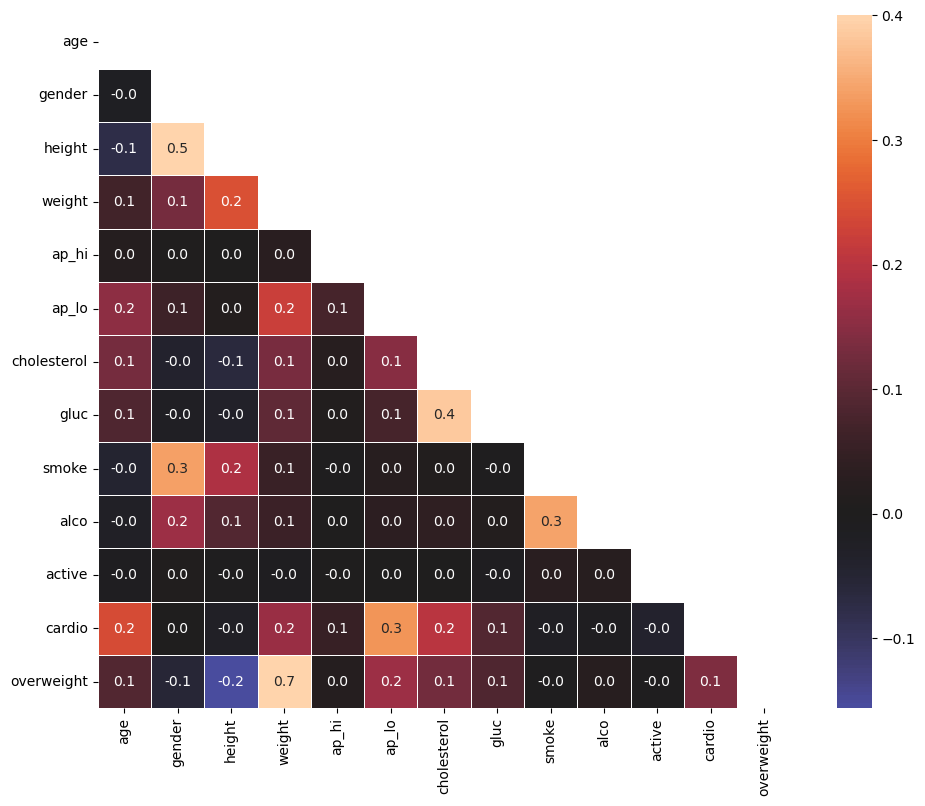

In [40]:
# Calculate the correlation matrix

corr = df.corr()

 # Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# with sns.axes_style("white"):
fig, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap with 'sns.heatmap()'

sb.heatmap(corr, mask=mask,vmax=0.4, center=0,annot = True,
            square=True,fmt=".1f", linewidths=0.5)